<a href="https://colab.research.google.com/github/doeungim/ADP_DE/blob/main/AD_SET_2_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>:root {--jp-notebook-max-width: 3000px;}</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import pandas as pd

import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_SET_2/data/nba.csv')

In [ ]:
# hot_distance (슛거리) : LOC_X, LOX_Y 좌표의 제곱합에 루트를 씌운다
df['shot_distance'] = np.sqrt(df['LOC_X'] **2  + df['LOC_Y'] **2 )

# net_play_time (경기경과시간) : 슛을 시도한 시점의 순 경기 시간을 초(sec)단위로 구한다. 쉬는시간은 고려하지 않는다.
# 4쿼터 종료시점(MINS_LEFT =0, SECS_LEFT=0)에 슛을 시도했다면 2880 값

# Qaunter * 12분 * 60초 (전체경기시간) -( MIN_LEFT *60) - SEC_LEFT
df['net_play_time'] = (df['QUARTER'] * 12 * 60 )- (df['MINS_LEFT'] * 60) - df['SECS_LEFT']

# score
df['MADE'] = df['SHOT_MADE'].astype(int)
df['score'] = df['SHOT_TYPE'].str.split('PT').str[0].astype(int) * df['MADE']


net_score : 해당 게임에 해당팀이 슛을 쏜 결과를 반영한 누적 득점

In [ ]:
# 해당 팀 이름과 게임 아이디의 고유값을 추출

lst = []
for name, id in df[['TEAM_NAME','GAME_ID']].drop_duplicates().values :
  target = df[ (df['TEAM_NAME'] == name)  & (df['GAME_ID'] == id)].sort_values('net_play_time')
  target['net_score'] = target['score'].cumsum()
  lst.append(target)

df1 = pd.concat(lst).reset_index(drop = True)

In [ ]:
#df1 = df1.drop(columns = ['SHOT_TYPE' ,'MADE'])


295049846

In [ ]:
# Team_name, game_id 별 net_score의 최대값 프레임
# ID 별로 더 큰 것들이 승리 [1,0]
sc = df1.groupby(['TEAM_NAME','GAME_ID'])['net_score'].max().reset_index()

lst = []
for game in sc.GAME_ID.unique() :
  # GAME_ID별 net_score 별로 sorting 한 다음 1,0을 입힘
  target = sc[sc.GAME_ID == game].sort_values('net_score').reset_index(drop = True)
  target['result'] = [0,1]
  lst.append(target)

t = pd.concat(lst).reset_index(drop = True)
t.head(10)

,TEAM_NAME,GAME_ID,net_score,result
0,team_2,22300001,96,0
1,team_1,22300001,105,1
2,team_15,22300019,92,0
3,team_1,22300019,109,1
4,team_28,22300039,129,0
5,team_1,22300039,136,1
6,team_16,22300047,93,0
7,team_1,22300047,114,1
8,team_5,22300064,97,0
9,team_1,22300064,132,1


In [ ]:
lst = []
for name, id  in t[['TEAM_NAME','GAME_ID']].drop_duplicates().values:
  target = df1[(df['TEAM_NAME']== name) & (df1.GAME_ID == id)].reset_index()
  lst.append(target)

df4 = pd.concat(lst).reset_index(drop = True)
df4

,index,TEAM_NAME,PLAYER_ID,POSITION_GROUP,GAME_ID,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,ZONE_ABB,LOC_X,LOC_Y,QUARTER,MINS_LEFT,SECS_LEFT,shot_distance,net_play_time,MADE,score,net_score
0,166596,team_2,player_471,F,22300001,False,Turnaround Jump Shot,2PT Field Goal,C,-5.9,10.55,1,11,23,12.087700,37,0,0,0
1,166597,team_2,player_472,G,22300001,True,Driving Dunk Shot,2PT Field Goal,C,2.0,5.35,1,10,56,5.711611,64,1,2,2
2,166598,team_2,player_472,G,22300001,True,Running Jump Shot,3PT Field Goal,LC,14.1,26.85,1,10,25,30.327092,95,1,3,5
3,166599,team_2,player_471,F,22300001,False,Pullup Jump shot,2PT Field Goal,R,-14.2,11.85,1,10,3,18.494932,117,0,0,5
4,166600,team_2,player_473,F,22300001,False,Jump Shot,3PT Field Goal,RC,-11.6,29.45,1,9,20,31.652212,160,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207099,64883,team_9,player_198,F,22300481,True,Driving Layup Shot,2PT Field Goal,C,-1.8,6.55,4,1,29,6.792827,2791,1,2,94
207100,64884,team_9,player_204,G,22300481,True,Running Pull-Up Jump Shot,3PT Field Goal,C,-4.7,30.95,4,1,3,31.304832,2817,1,3,97
207101,64885,team_9,player_196,F,22300481,False,Jump Shot,3PT Field Goal,LC,15.0,26.15,4,0,30,30.146683,2850,0,0,97
207102,64886,team_9,player_204,G,22300481,True,Driving Layup Shot,2PT Field Goal,C,-0.0,6.35,4,0,12,6.350000,2868,1,2,99


In [ ]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
X,y=pd.DataFrame(cali.data,columns =cali['feature_names']), pd.DataFrame(cali.target,columns =['MedHouseVal'])
display(X.head())
display(y.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


데이터 EDA 및 시각화

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

<Axes: >

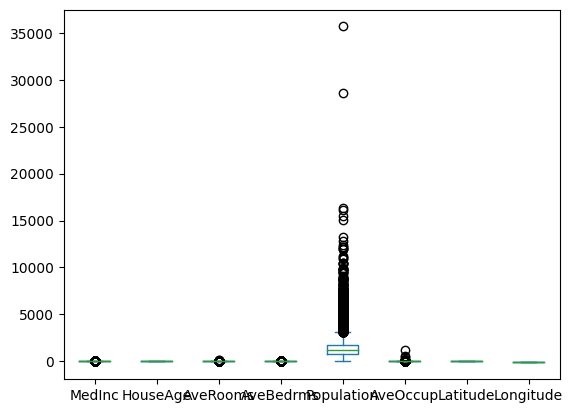

In [ ]:
print(X.describe())

X.plot(kind = 'box')

변수들의 다중공선성을 검토하라

In [ ]:
## 다중공선성
# 독립변수들

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['cols'] = X.columns
vif['value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)  # 15 이상 제거

         cols       value
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


회귀모델을 제작할 때 다중공선성을 줄이기 위한 방법 3가지를 서술

In [ ]:
# vif 값을 고려한 변수 제거
# PCA를 통한 차원 축소
# 회귀 모델링 시 변수 규제 모델 채택 / 라쏘, 릿지

훈련용 데이터와 평가용 데이터를 7:3으로 분리한 후, 다중선형회귀모델과 엘라스틱넷모델을 통해 회귀 모델링을 진행하고 rmse값을 기준으로 평가하라. 엘라스틱넷 모델의 경우, 정규화 강도 파라미터를 2가지, l1,l2 페널티를 3가지 방식으로 조정한 모델 총 6개를 만들고 결과에 대해 분석하라

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 42)

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))


In [ ]:
# alpha = 정규화 강도 , 패널티의 강도를 의미 계수를 더 줄인다.
# L1 : Lassp (특정 변수의 계수를 0으로) , L2 : Ridge (모든 변수의 계수를 줄인다.)

alphas = [0.1 , 1]
L1_ratio = [0.2, 0.5, 0.8]

lst = []
for alpha in alphas :
  for ratio in L1_ratio :
    en = ElasticNet(alpha = alpha, l1_ratio=ratio, random_state = 42)
    en.fit(x_train, y_train)
    en_pred = en.predict(x_test)

    en_rmse = np.sqrt(mean_squared_error(y_test, en_pred))

    result = {
        'alpha' : alphas,
        'L1_ratio' : ratio ,
        'RMSE' : en_rmse
    }
    lst.append(result)

pd.DataFrame(lst).sort_values('RMSE')

,alpha,L1_ratio,RMSE
0,"[0.1, 1]",0.2,0.736857
1,"[0.1, 1]",0.5,0.746421
2,"[0.1, 1]",0.8,0.759826
3,"[0.1, 1]",0.2,0.833016
4,"[0.1, 1]",0.5,0.869651
5,"[0.1, 1]",0.8,0.920629


한 제조회사에서는 제품의 품질을 보장하기 위해 생산 라인에서 무작위로 10개의 제품을 샘플링하여 품질 검사를 실시한다. 이때, 제품이 불량일 확률은 23%다. </br>

(1) 적어도 3개의 제품이 불량일 확률은? </br>
(2) 2개 이하의 제품이 불량일 확률은?

In [ ]:
from scipy.stats import binom , poisson
from scipy.stats import shapiro
n = 10
p = 0.23

# 1) 적어도 3개 : 1 - 2회
rv = binom(n,p)
print(1 - rv.cdf(2))

# 2) 2개 이하 : 2개 까지의 누적
print(rv.cdf(2))

0.5862827261618817

어느 고객 서비스 센터에는 센터에는 평균적으로 1분에 3건의 전화가 걸려온다. 전화 빈도는 아래와 같은 조건을 가진다. 전화가 걸려오는 사건이 독립적이다. 특정 시간 동안에 전화가 걸려올 확률이 일정하다. 단위 시간 내에 동시에 두 개 이상의 전화가 걸려올 확률은 매우 낮다. </br>

(1) 10분 동안 전화가 23통 이하로 걸려올 확률은? </br>
(2) 10분 동안 전화가 정확히 30통 걸려올 확률은?

In [ ]:
mean = 30

rv  = stats.poisson(mean)

# 23통 이하
print(rv.cdf(23))
# 정확히 30통
print(rv.pmf(30))

0.11464591271427384
0.07263452647159181


한 회사에서 직원들의 근무 만족도가 개선되었는지를 평가하기 위해, 직원들에게 개선 전과 개선 후의 만족도를 각각 설문조사했다. 만족도 점수는 1에서 10까지의 범위로 측정된다. 다음은 10명의 직원이 제공한 만족도 점수다 </br>

개선 전: [5, 6, 7, 5, 6, 8, 7, 5, 6, 9] </br>
개선 후: [6, 7, 8, 6, 7, 9, 8, 6, 7, 10]

In [ ]:
from scipy.stats import wilcoxon

before = [5, 6, 7, 5, 6, 8, 7, 5, 6, 9]
after = [6, 7, 8, 6, 7, 9, 8, 6, 7, 10]

# 대응표본
# 정규성
b_stat, b_p_val = stats.shapiro(before)
a_stat, a_p_val = stats.shapiro(after)

if b_p_val > 0.05 :
  print('귀무가설을 기각 정규가 아니다')
else :
  print('정규분포이다')

# 대응표본- 비모수 검정
stat, p_val = wilcoxon(before, after)

print("""귀무가설 : 개선 전 후의 만족도는 같다.
         대립개설 : 개선 전 후의 만족도는 다르다.

""")

if p_val > 0.05 :
  print('귀무가설을 개선 전 후의 만족도는 다르다')
else :
  print('귀무가설채택 개선 전 후의 만족도는 같다')


귀무가설을 기각 정규가 아니다
귀무가설 : 개선 전 후의 만족도는 같다. 
         대립개설 : 개선 전 후의 만족도는 다르다.


귀무가설채택 개선 전 후의 만족도는 같다


어느 부품공장의 1000개 부품 샘플의 무게(g)를 기록한 데이터셋

In [ ]:
import scipy.stats as stats

df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_SET_2/data/s5.csv')

# 183개의 샘플을 추출했을 때 샘플 무게의 평균이 69.5g에서 70.1g 사이에 있을 확률
mean = df['w'].mean()
std = df['w'].std()

n = 183
se = std / np.sqrt(n)

lower = 69.5
upper = 70.1

l_z = (lower - mean) / se
u_z = (upper - mean) / se

# 확률 변환 (까지의 누적)
p_low = stats.norm.cdf(l_z)
p_upper = stats.norm.cdf(u_z)

# 사이의 확률
print(p_upper - p_low
)

# 라이브러리 풀이
ans = stats.norm.cdf(upper, loc = mean, scale = se) - stats.norm.cdf(lower, loc = mean, scale = se)
print(ans)

0.5876910371573993
0.5876910371573993
